# PiVR Data Analysis

In [2]:
#The following is a collection of code for basic analysis of raw data csv files from PiVR

In [2]:
#Manually Import PiVR Data csv file for analysis

import pandas as pd
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import math
from statistics import median


data = pd.read_csv (r'E:College\research\Single_Fly_Tracking_data(7-26)\raw_data_copies\H003xC012\Trial2.1_data.csv') #select path to desired data file 
df = pd.DataFrame(data, columns= ['X-Centroid','Y-Centroid','X-Head','Y-Head','X-Tail','Y-Tail','Stim Ch1','Time'])


## Basic Linear Speed Analysis Based on Centroid

In [3]:
#determine x coordinates of all stimulus events, create 2 lists, 1 of stim on time, 1 of stim off time
#required to generate dynamic stimulus patch indicators in the below graph

Stim_Ch1 = df['Stim Ch1'].tolist()
stim_time = df['Time'].tolist()
on_times=[]
off_times=[]
duration=[]

for i in range(1,len(Stim_Ch1)):
    if Stim_Ch1[i] > 0 and Stim_Ch1[i-1] == 0:
        on_times.append(stim_time[i])
    elif Stim_Ch1[i] == 0 and Stim_Ch1[i-1] > 0:
        off_times.append(stim_time[i])
        
for i in range(0,len(on_times)):
   duration.append(off_times[i] - on_times[i])


C:\Users\Tommy\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


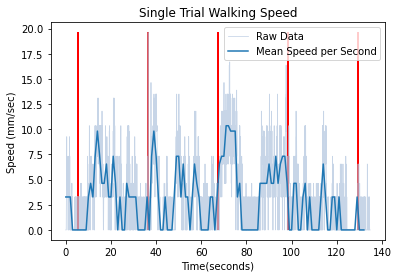

In [25]:
#Generate basic plot of speed (units per second) over time

# determine framerate
time_data = pd.DataFrame(data, columns= ['Time'])
framerate = (len(time_data)) / (time_data['Time'].iat[-1])
ideal_frate = 25

resolution = 7.64 #pixels/mm

X_shift = np.zeros((len(df),1))
Y_shift = np.zeros((len(df),1))
Speed = np.zeros((len(df),1))
Acceleration = np.zeros((len(df),1))

for i in range(3,(len(df)-5)):
    X_shift[i] = df._get_value(i,'X-Centroid') - df._get_value(i-1,'X-Centroid')
    Y_shift[i] = df._get_value(i,'Y-Centroid') - df._get_value(i-1,'Y-Centroid')
    Speed[i] = ((math.sqrt((X_shift[i] ** 2) + (Y_shift[i] ** 2))) * framerate)/resolution # units: mm/s
    Acceleration[i] = (Speed[i] - Speed[i-1]) * framerate #units: mm/s^2
    
num_values = list(range(len(df)))
x_axis = np.zeros((len(df),1))
for i in range(0,len(df)):
    x_axis[i] = num_values[i]/framerate
    
mean=[]
for i in range(1,((int(len(Speed)/framerate)))):
    mean.append(median(Speed[range(((i-1)*ideal_frate),(i*ideal_frate))]))

figure, ax = plt.subplots(1)
ax.plot(x_axis, Speed, c='lightsteelblue', lw=0.8, alpha=0.7, label='Raw Data')
ax.plot(mean, label='Mean Speed per Second')
plt.xlabel('Time(seconds)')
plt.ylabel('Speed (mm/sec)')
plt.title('Single Trial Walking Speed')
plt.legend()

bar_height = max(Speed)
rectangle={}
for i in range(0,len(on_times)):
    rectangle[i] = patches.Rectangle((on_times[i],0), duration[i], bar_height, facecolor='red')
    ax.add_patch(rectangle[i])


## Plot 2D Navigation Path Color Coded by Speed

Text(0, 0.5, 'millimeters')

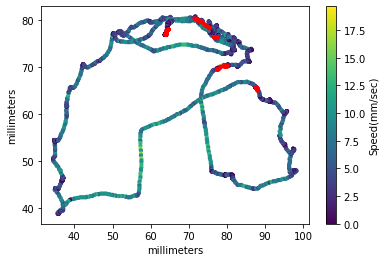

In [5]:
# plot fly tracking path with color coding based on speed and stimulus state
#color scaling dynamic, will adjust to dataset speed range
        
X_coords = df['X-Centroid'].tolist()
Y_coords = df['Y-Centroid'].tolist()
X_mm=[]
Y_mm=[]
for i in range(0,len(X_coords)):
    X_mm.append(X_coords[i]/resolution)
    Y_mm.append(Y_coords[i]/resolution)

plt.scatter(X_mm, Y_mm, s=10, c=Speed, cmap='viridis')
plt.colorbar(label='Speed(mm/sec)')
for i in range(1,len(X_mm)):
    if df._get_value(i,'Stim Ch1') != 0:
        plt.scatter(X_mm[i], Y_mm[i], s=10, c='r')
plt.xlabel('millimeters')
plt.ylabel('millimeters')

  
# adds directional arrows to graph if desired

#scaler=50
#x_arrows=[]
#y_arrows=[]
#yplus1 = []
#xplus1 = []
#for i in range(1,int((len(X_coords)/scaler))):
#    x_arrows.append((X_coords[i*scaler])/resolution)
#    y_arrows.append((Y_coords[i*scaler])/resolution)
#    xplus1.append((X_coords[(i*scaler)+1])/resolution)
#    yplus1.append((Y_coords[(i*scaler)+1])/resolution)
#    
#dx=[]
#dy=[]
#for i in range(0,len(x_arrows)-1):
#    dx.append(xplus1[i] - x_arrows[i])
#    dy.append(yplus1[i] - y_arrows[i])
#    
#plt.quiver(x_arrows[:-1], y_arrows[:-1], dx, dy, scale_units='xy', angles='xy', scale=0.15)

## Arrow Plot: Directional Path Approximation + Color Coding by Time

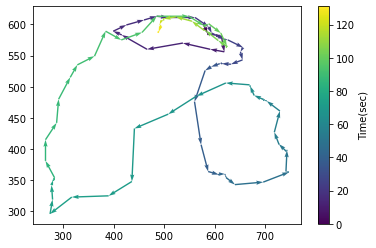

In [6]:
#visual path direction indicator

scaler=25
x_arrows=[]
y_arrows=[]
for i in range(1,int((len(X_coords)/scaler))):
    x_arrows.append(X_coords[i*scaler])
    y_arrows.append(Y_coords[i*scaler])

Scale = list(range(0,len(y_arrows)-1))
    
dx=[]
dy=[]
for i in range(0,len(x_arrows)-1):
    dx.append(x_arrows[i+1] - x_arrows[i])
    dy.append(y_arrows[i+1] - y_arrows[i])
    
plt.quiver(x_arrows[:-1], y_arrows[:-1], dx, dy, Scale, cmap='viridis', scale_units='xy', angles='xy', scale=1)
plt.colorbar(label='Time(sec)')


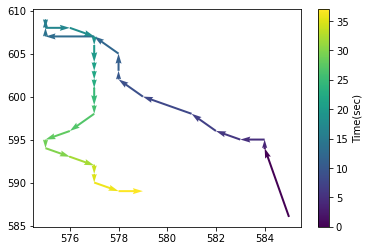

In [22]:
# Delete this cell eventually
# zoom in on sections of plot with directionality to confirm accuracy of turning angles frame by frame

scaler=1
x_arrows=[]
y_arrows=[]
for i in range(1,int((len(X_coords)/scaler))):
    x_arrows.append(X_coords[i*scaler])
    y_arrows.append(Y_coords[i*scaler])

Scale = list(range(0,len(y_arrows)-3331))
    
dx=[]
dy=[]
for i in range(0,len(x_arrows)-1):
    dx.append(x_arrows[i+1] - x_arrows[i])
    dy.append(y_arrows[i+1] - y_arrows[i])

plt.quiver(x_arrows[:-3331], y_arrows[:-3331], dx[:-3330], dy[:-3330], Scale, cmap='viridis', scale_units='xy', angles='xy', scale=1)
plt.colorbar(label='Time(sec)')

## Heading Orientation over Time

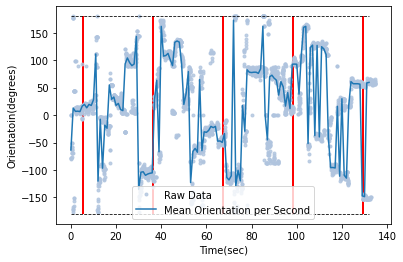

In [21]:
# data begins at index 0 (frame 0) from coordinate values
# 0 degrees is directly upward facing, 180degrees is directly down facing. net right is +90 degrees, net left is -90degrees

#this block is incomplete: data is yielding many indices where both x_shift and y_shift=0 (ie placing head coordinate on 
    #top of tail coordinate), which cannot confirm orientation. Current "solution": setting faulty indices equal to the hd_angle
    #of the prior accurate index. This is an estimation though that is only accurate if number of successive faulty values is
    #small, otherwise yields inaccurate extended periods of static orientation

y_shift = np.zeros((len(df),1))
x_shift = np.zeros((len(df),1))
hd_angle = np.zeros((len(df),1))

for i in range(1,len(df)):
    x_shift[i] = df._get_value(i,'X-Head') - df._get_value(i,'X-Tail')
    y_shift[i] = df._get_value(i,'Y-Head') - df._get_value(i,'Y-Tail')
    
for i in range(1,len(df)):
    if x_shift[i] > 0 and y_shift[i] > 0:
        hd_angle[i] = math.degrees(math.atan(abs(y_shift[i])/abs(x_shift[i]))) # upper right quadrant: 0 < x < 90
    elif x_shift[i] < 0 and y_shift[i] > 0:
        hd_angle[i] = -(math.degrees(math.atan(abs(y_shift[i])/abs(x_shift[i])))) # upper left quadrant: 0 > x > -90
    elif x_shift[i] > 0 and y_shift[i] < 0:
        hd_angle[i] = (math.degrees(math.atan(abs(y_shift[i])/abs(x_shift[i])))) + 90 # lower right quadrant: 90 < x < 180
    elif x_shift[i] < 0 and y_shift[i] < 0:
        hd_angle[i] = -(math.degrees(math.atan(abs(y_shift[i])/abs(x_shift[i])))) - 90 # lower left quadrant: -90 > x > 180
    elif x_shift[i] == 0 and y_shift[i] > 0:
        hd_angle[i] = 0 # fly facing due north
    elif x_shift[i] == 0 and y_shift[i] < 0:
        hd_angle[i] = 180 # fly facing due south
    elif x_shift[i] > 0 and y_shift[i] == 0:
        hd_angle[i] = 90 # fly facing due east
    elif x_shift[i] < 0 and y_shift[i] == 0:
        hd_angle[i] = -90 # fly facing due west
    elif x_shift[i] == 0 and y_shift[i] == 0:
        hd_angle[i] = hd_angle[i-1] # estimate: setting faulty values equal to the last properly recorded value
        
time=list(range(len(hd_angle)))
for i in range(0,len(hd_angle)):
    time[i] = time[i]/ framerate
    
lower_bound = [-180 for i in range(1,((int(len(hd_angle)/framerate))))]
upper_bound = [180 for i in range(1,((int(len(hd_angle)/framerate))))]

mean=[]
for i in range(1,((int(len(hd_angle)/framerate)))):
    mean.append(median(hd_angle[range(((i-1)*ideal_frate),(i*ideal_frate))]))
        
figure, ay = plt.subplots(1)

ay.plot(time, hd_angle, c='lightsteelblue', alpha=0.8, label='Raw Data', marker='o', lw=0, markersize=3)
ay.plot(mean, label='Mean Orientation per Second')
ay.plot(lower_bound, '--', c='black', lw=0.8)
ay.plot(upper_bound, '--', c='black', lw=0.8)
ay.legend()
plt.xlabel('Time(sec)')
plt.ylabel('Orientatoin(degrees)')
bar_height = 360
rectangle={}
for i in range(0,len(on_times)):
    rectangle[i] = patches.Rectangle((on_times[i],-180), duration[i], bar_height, facecolor='red')
    ay.add_patch(rectangle[i])